<a href="https://colab.research.google.com/github/AlphaVS-76/Stock_Price_Prediction/blob/main/Stock_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# importing all the necessary libraries and modules

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# install the yfinance package before importing it, else you'll get an error
import yfinance as yf

In [2]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 10.4 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
stocks = input("Enter the Share code: ")
data = yf.download(stocks, "2015-01-01", "2022-01-01", auto_adjust=True)
data.head

Enter the Share code: GC=F
[*********************100%***********************]  1 of 1 completed


<bound method NDFrame.head of                    Open         High          Low        Close  Volume
Date                                                                  
2015-01-02  1184.000000  1194.500000  1169.500000  1186.000000     138
2015-01-05  1180.300049  1206.900024  1180.099976  1203.900024     470
2015-01-06  1203.500000  1220.000000  1203.500000  1219.300049      97
2015-01-07  1219.199951  1219.199951  1210.599976  1210.599976      29
2015-01-08  1207.000000  1215.699951  1206.300049  1208.400024      92
...                 ...          ...          ...          ...     ...
2021-12-27  1810.000000  1812.099976  1807.000000  1808.099976     150
2021-12-28  1812.000000  1818.000000  1805.500000  1810.199951     146
2021-12-29  1803.199951  1805.099976  1791.400024  1805.099976     623
2021-12-30  1801.699951  1816.000000  1796.000000  1812.699951     306
2021-12-31  1825.099976  1827.800049  1821.400024  1827.500000      80

[1761 rows x 5 columns]>

<function matplotlib.pyplot.show>

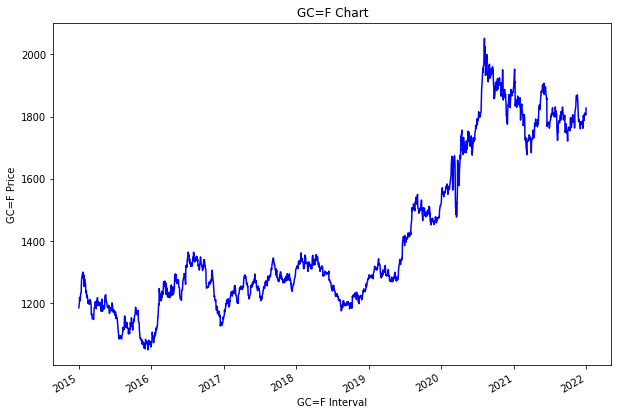

In [5]:
data.Close.plot(figsize=(10, 7), color="b")

plt.ylabel("{} Price".format(stocks))
plt.xlabel("{} Interval".format(stocks))
plt.title("{} Chart".format(stocks))
plt.show

In [6]:
data.describe

<bound method NDFrame.describe of                    Open         High          Low        Close  Volume
Date                                                                  
2015-01-02  1184.000000  1194.500000  1169.500000  1186.000000     138
2015-01-05  1180.300049  1206.900024  1180.099976  1203.900024     470
2015-01-06  1203.500000  1220.000000  1203.500000  1219.300049      97
2015-01-07  1219.199951  1219.199951  1210.599976  1210.599976      29
2015-01-08  1207.000000  1215.699951  1206.300049  1208.400024      92
...                 ...          ...          ...          ...     ...
2021-12-27  1810.000000  1812.099976  1807.000000  1808.099976     150
2021-12-28  1812.000000  1818.000000  1805.500000  1810.199951     146
2021-12-29  1803.199951  1805.099976  1791.400024  1805.099976     623
2021-12-30  1801.699951  1816.000000  1796.000000  1812.699951     306
2021-12-31  1825.099976  1827.800049  1821.400024  1827.500000      80

[1761 rows x 5 columns]>

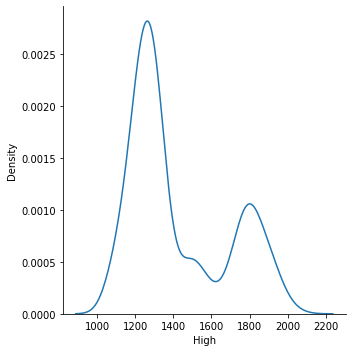

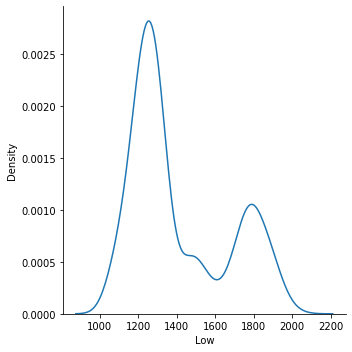

In [7]:
#understanding the data

sns.displot(data["High"], kind="kde")
sns.displot(data["Low"], kind="kde")

What have we learnt:-

- Distribution over time
- Data is extremely non-linear

In [30]:
x = data.drop("Close", axis = 1)
y = data["Close"]

#splitting the data into training and validating datasets

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)
# test size is 0.2 as we are using 20% data for validating the model and the rest for training

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(1408, 4)
(353, 4)
(1408,)
(353,)


In [45]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred1 = lr.predict(x_val)

pred1

array([1519.18406906, 1309.06963553, 1336.35042871, 1248.2161587 ,
       1710.85426183, 1670.01005403, 1277.2078924 , 1275.52364426,
       1754.05294294, 1825.03625218, 1097.0485035 , 1059.33111108,
       1825.73889283, 1105.50219812, 1063.62434871, 1304.91262356,
       1805.31057524, 1717.56906591, 1154.51924967, 1168.06252233,
       1407.19664109, 1306.97055758, 1227.86295181, 1576.18260806,
       1825.51524167, 1546.29514597, 1521.47570397, 1131.19546165,
       1275.35774719, 1204.9638062 , 1572.20778343, 1428.78194811,
       1283.51915688, 1966.24163183, 1152.48903921, 1897.64286787,
       1315.62373002, 1253.12547415, 1157.52130741, 1334.59458723,
       1199.53043666, 1249.29284676, 1411.04404266, 1780.72773112,
       1282.60307526, 1890.15310653, 1146.58083433, 1784.1519157 ,
       1328.45362898, 1340.78035189, 1278.83359323, 1085.70901196,
       1812.24899371, 1800.06618566, 1371.14379743, 1462.67017284,
       1081.21337435, 1261.56142915, 1218.55891584, 1303.58565

In [10]:
y_val

Date
2019-08-23    1526.599976
2017-08-30    1308.099976
2016-08-22    1337.699951
2017-03-24    1248.199951
2020-05-08    1709.900024
                 ...     
2019-03-04    1284.800049
2018-11-12    1201.300049
2017-02-27    1257.400024
2021-05-07    1831.099976
2019-03-14    1293.400024
Name: Close, Length: 353, dtype: float64

predicted = 1519.184

actual = 1526.599

The predicted value is pretty close but not accurate.

We are going to use MSE (for CF of Linear Regression)

MSE is a measure of the quality of a prediction, it is always positive, and values which are closer to zero are better

Then we'll be using RMSE-> A standard way to measure the error of a model-> sqrt(MSE)

In [46]:
def calc_metrics(actual, predicted):
  mse = mean_squared_error(actual, predicted)
  rmse = np.sqrt(mse)
  r2s = r2_score(actual, predicted)

  print("MSE:", mse)
  print("RMSE:", rmse)
  print("r2_score:", r2s)
  
calc_metrics(y_val, pred1)

MSE: 25.393099195259296
RMSE: 5.039156595627814
r2_score: 0.9996022522928502


Linear regression was acceptable but let's go into regularized linear models(Ridge/Lasso regression)

In [ ]:
la = Lasso().fit(x_train, y_train)
ri = Ridge().fit(x_train, y_train)

la_pred = la.predict(x_val)
ri_pred = ri.predict(x_val)

In [51]:
calc_metrics(y_val, la_pred)

# We can see that the rmse value for Lasso is worse than Ridge/Linear regression models

MSE: 51.98900959573848
RMSE: 7.210340463233236
r2_score: 0.9991856642151205


In [52]:
calc_metrics(y_val, ri_pred)

# This is less prone to overfitting

MSE: 25.39327323284839
RMSE: 5.039173864121816
r2_score: 0.9996022495667926


In [60]:
# We can also use SVM although it would be better with large number of features
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_val)
svr_pred

array([1306.04766994, 1306.36945862, 1311.0733729 , 1272.49530585,
       1306.06333945, 1306.04766996, 1298.75437827, 1277.72499256,
       1306.04766994, 1310.3239126 , 1291.3434241 , 1303.84743959,
       1306.04766994, 1306.04766994, 1305.32318598, 1306.04640977,
       1321.52034013, 1306.04766994, 1304.69892203, 1305.81710871,
       1316.09196968, 1303.66758553, 1290.83640092, 1306.04766994,
       1310.32985716, 1313.3167011 , 1306.04772548, 1302.01847575,
       1297.93691604, 1302.35957115, 1315.15976852, 1306.04766994,
       1304.99754838, 1306.07844626, 1292.39678432, 1306.04766994,
       1313.73429175, 1302.06088155, 1304.55912282, 1327.14854506,
       1235.17514236, 1296.9927051 , 1306.04766994, 1306.04863977,
       1305.98135463, 1306.08503396, 1301.85995869, 1310.52534295,
       1310.00337597, 1306.04766994, 1296.91188209, 1291.78865974,
       1306.04775091, 1309.49893378, 1306.05984987, 1306.04766994,
       1294.70263436, 1306.04431809, 1305.97910767, 1302.01637

In [61]:
calc_metrics(y_val, svr_pred)

# We get extremely bad rmse value as the dataset has very less number of features so we use Linear/Ridge regression for this

MSE: 71769.65766563555
RMSE: 267.8985958635012
r2_score: -0.12417222332450151
